# Anomaly detection

In [1]:
clear ; close all; clc

Visualizing example dataset for outlier detection.



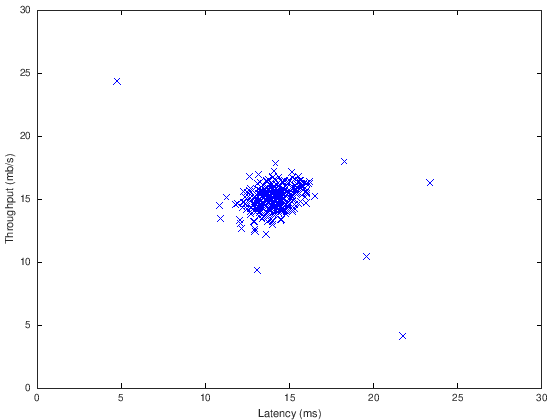

In [62]:
%% ================== Part 1: Load Example Dataset  ===================
%  We start this exercise by using a small dataset that is easy to
%  visualize.
%
%  Our example case consists of 2 network server statistics across
%  several machines: the latency and throughput of each machine.
%  This exercise will help us find possibly faulty (or very fast) machines.
%

fprintf('Visualizing example dataset for outlier detection.\n\n');

%  The following command loads the dataset. You should now have the
%  variables X, Xval, yval in your environment
load('ex8data1.mat');

%  Visualize the example dataset
plot(X(:, 1), X(:, 2), 'bx');
axis([0 30 0 30]);
xlabel('Latency (ms)');
ylabel('Throughput (mb/s)');

Visualizing Gaussian fit.

Best epsilon found using cross-validation: 8.990853e-05
Best F1 on Cross Validation Set:  0.875000
   (you should see a value epsilon of about 8.99e-05)
   (you should see a Best F1 value of  0.875000)



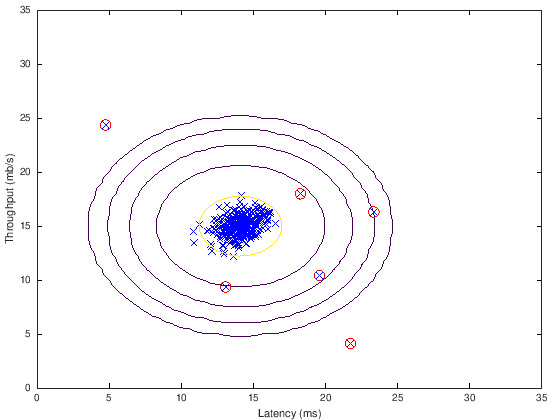

In [63]:
%% ================== Part 2: Estimate the dataset statistics ===================
%  For this exercise, we assume a Gaussian distribution for the dataset.
%
%  We first estimate the parameters of our assumed Gaussian distribution, 
%  then compute the probabilities for each of the points and then visualize 
%  both the overall distribution and where each of the points falls in 
%  terms of that distribution.
%
fprintf('Visualizing Gaussian fit.\n\n');

%  Estimate my and sigma2
[mu sigma2] = estimateGaussian(X);

%  Returns the density of the multivariate normal at each data point (row) 
%  of X
p = multivariateGaussian(X, mu, sigma2);

%  Visualize the fit
visualizeFit(X,  mu, sigma2);
xlabel('Latency (ms)');
ylabel('Throughput (mb/s)');

%% ================== Part 3: Find Outliers ===================
%  Now you will find a good epsilon threshold using a cross-validation set
%  probabilities given the estimated Gaussian distribution
% 

pval = multivariateGaussian(Xval, mu, sigma2);

[epsilon F1] = selectThreshold(yval, pval);
fprintf('Best epsilon found using cross-validation: %e\n', epsilon);
fprintf('Best F1 on Cross Validation Set:  %f\n', F1);
fprintf('   (you should see a value epsilon of about 8.99e-05)\n');
fprintf('   (you should see a Best F1 value of  0.875000)\n\n');

%  Find the outliers in the training set and plot the
outliers = find(p < epsilon);

%  Draw a red circle around those outliers
hold on
plot(X(outliers, 1), X(outliers, 2), 'ro', 'LineWidth', 2, 'MarkerSize', 10);
hold off

In [65]:
%% ================== Part 4: Multidimensional Outliers ===================
%  We will now use the code from the previous part and apply it to a 
%  harder problem in which more features describe each datapoint and only 
%  some features indicate whether a point is an outlier.
%

%  Loads the second dataset. You should now have the
%  variables X, Xval, yval in your environment
load('ex8data2.mat');

%  Apply the same steps to the larger dataset
[mu sigma2] = estimateGaussian(X);

%  Training set 
p = multivariateGaussian(X, mu, sigma2);

%  Cross-validation set
pval = multivariateGaussian(Xval, mu, sigma2);

%  Find the best threshold
[epsilon F1] = selectThreshold(yval, pval);

fprintf('Best epsilon found using cross-validation: %e\n', epsilon);
fprintf('Best F1 on Cross Validation Set:  %f\n', F1);
fprintf('   (you should see a value epsilon of about 1.38e-18)\n');
fprintf('   (you should see a Best F1 value of 0.615385)\n');
fprintf('# Outliers found: %d\n\n', sum(p < epsilon));

Best epsilon found using cross-validation: 1.377229e-18
Best F1 on Cross Validation Set:  0.615385
   (you should see a value epsilon of about 1.38e-18)
   (you should see a Best F1 value of 0.615385)
# Outliers found: 117



# Recommender Systems

Loading movie ratings dataset.

Average rating for movie 1 (Toy Story): 3.878319 / 5



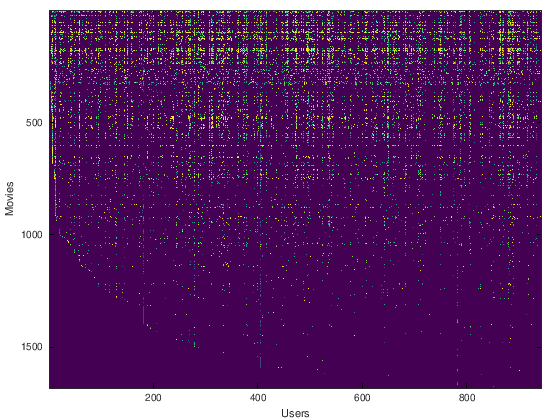

In [69]:
%% =============== Part 1: Loading movie ratings dataset ================
%  You will start by loading the movie ratings dataset to understand the
%  structure of the data.
%  
fprintf('Loading movie ratings dataset.\n\n');

%  Load data
load ('ex8_movies.mat');

%  Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies on 
%  943 users
%
%  R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a
%  rating to movie i

%  From the matrix, we can compute statistics like average rating.
fprintf('Average rating for movie 1 (Toy Story): %f / 5\n\n', ...
        mean(Y(1, R(1, :))));

%  We can "visualize" the ratings matrix by plotting it with imagesc
imagesc(Y);
ylabel('Movies');
xlabel('Users');

In [125]:
%% ============ Part 2: Collaborative Filtering Cost Function ===========
%  You will now implement the cost function for collaborative filtering.
%  To help you debug your cost function, we have included set of weights
%  that we trained on that. Specifically, you should complete the code in 
%  cofiCostFunc.m to return J.

%  Load pre-trained weights (X, Theta, num_users, num_movies, num_features)
load ('ex8_movieParams.mat');

%  Reduce the data set size so that this runs faster
num_users = 4; num_movies = 5; num_features = 3;
X = X(1:num_movies, 1:num_features);
Theta = Theta(1:num_users, 1:num_features);
Y = Y(1:num_movies, 1:num_users);
R = R(1:num_movies, 1:num_users);

%  Evaluate cost function
J = cofiCostFunc([X(:) ; Theta(:)], Y, R, num_users, num_movies, ...
               num_features, 0);
           
fprintf(['Cost at loaded parameters: %f '...
         '\n(this value should be about 22.22)\n'], J);


Cost at loaded parameters: 22.224604 
(this value should be about 22.22)


In [126]:
%% ============== Part 3: Collaborative Filtering Gradient ==============
%  Once your cost function matches up with ours, you should now implement 
%  the collaborative filtering gradient function. Specifically, you should 
%  complete the code in cofiCostFunc.m to return the grad argument.
%  
fprintf('\nChecking Gradients (without regularization) ... \n');

%  Check gradients by running checkNNGradients
checkCostFunction;


Checking Gradients (without regularization) ... 
   -2.628840   -2.628840
    1.549166    1.549166
    0.760631    0.760631
    0.321808    0.321808
   15.100510   15.100510
   -3.529792   -3.529792
    3.102623    3.102623
   -0.567646   -0.567646
    1.792866    1.792866
    0.138751    0.138751
    1.787870    1.787870
    4.964045    4.964045
    2.971476    2.971476
    0.215661    0.215661
   -0.457541   -0.457541
   -0.261471   -0.261471
   -0.558900   -0.558900
   -4.250739   -4.250739
   -0.567203   -0.567203
   -5.306035   -5.306035
   -1.368309   -1.368309
    1.374637    1.374637
   -3.272873   -3.272873
    0.816371    0.816371
    0.327309    0.327309
   -0.072256   -0.072256
   -2.073147   -2.073147
The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient)

If your cost function implementation is correct, then 
the relative difference will be small (less than 1e-9). 

Relative Difference: 1.34264e-12


In [128]:
%% ========= Part 4: Collaborative Filtering Cost Regularization ========
%  Now, you should implement regularization for the cost function for 
%  collaborative filtering. You can implement it by adding the cost of
%  regularization to the original cost computation.
%  

%  Evaluate cost function
J = cofiCostFunc([X(:) ; Theta(:)], Y, R, num_users, num_movies, ...
               num_features, 1.5);
           
fprintf(['Cost at loaded parameters (lambda = 1.5): %f '...
         '\n(this value should be about 31.34)\n'], J);

Cost at loaded parameters (lambda = 1.5): 31.344056 
(this value should be about 31.34)


In [129]:
%% ======= Part 5: Collaborative Filtering Gradient Regularization ======
%  Once your cost matches up with ours, you should proceed to implement 
%  regularization for the gradient. 
%

%  
fprintf('\nChecking Gradients (with regularization) ... \n');

%  Check gradients by running checkNNGradients
checkCostFunction(1.5);


Checking Gradients (with regularization) ... 
   4.46052   4.46052
  -0.39094  -0.39094
   2.11274   2.11274
  -3.24770  -3.24770
  -3.71668  -3.71668
  -0.89226  -0.89226
  -1.74060  -1.74060
  -4.87858  -4.87858
   1.49466   1.49466
   1.76761   1.76761
  -1.98362  -1.98362
  -0.70010  -0.70010
   2.99430   2.99430
   0.33707   0.33707
  -4.24486  -4.24486
   1.95009   1.95009
   0.99013   0.99013
   5.44308   5.44308
   1.42038   1.42038
   3.57179   3.57179
  -0.33950  -0.33950
   0.43562   0.43562
   1.87087   1.87087
   1.76687   1.76687
  -0.49448  -0.49448
  -0.56975  -0.56975
   0.52899   0.52899
The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient)

If your cost function implementation is correct, then 
the relative difference will be small (less than 1e-9). 

Relative Difference: 1.88488e-12


In [130]:
%% ============== Part 6: Entering ratings for a new user ===============
%  Before we will train the collaborative filtering model, we will first
%  add ratings that correspond to a new user that we just observed. This
%  part of the code will also allow you to put in your own ratings for the
%  movies in our dataset!
%
movieList = loadMovieList();

%  Initialize my ratings
my_ratings = zeros(1682, 1);

% Check the file movie_idx.txt for id of each movie in our dataset
% For example, Toy Story (1995) has ID 1, so to rate it "4", you can set
my_ratings(1) = 4;

% Or suppose did not enjoy Silence of the Lambs (1991), you can set
my_ratings(98) = 2;

% We have selected a few movies we liked / did not like and the ratings we
% gave are as follows:
my_ratings(7) = 3;
my_ratings(12)= 5;
my_ratings(54) = 4;
my_ratings(64)= 5;
my_ratings(66)= 3;
my_ratings(69) = 5;
my_ratings(183) = 4;
my_ratings(226) = 5;
my_ratings(355)= 5;

fprintf('\n\nNew user ratings:\n');
for i = 1:length(my_ratings)
    if my_ratings(i) > 0 
        fprintf('Rated %d for %s\n', my_ratings(i), ...
                 movieList{i});
    end
end




New user ratings:
Rated 4 for Toy Story (1995)
Rated 3 for Twelve Monkeys (1995)
Rated 5 for Usual Suspects, The (1995)
Rated 4 for Outbreak (1995)
Rated 5 for Shawshank Redemption, The (1994)
Rated 3 for While You Were Sleeping (1995)
Rated 5 for Forrest Gump (1994)
Rated 2 for Silence of the Lambs, The (1991)
Rated 4 for Alien (1979)
Rated 5 for Die Hard 2 (1990)
Rated 5 for Sphere (1998)


In [131]:
%% ================== Part 7: Learning Movie Ratings ====================
%  Now, you will train the collaborative filtering model on a movie rating 
%  dataset of 1682 movies and 943 users
%

fprintf('\nTraining collaborative filtering...\n');

%  Load data
load('ex8_movies.mat');

%  Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies by 
%  943 users
%
%  R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a
%  rating to movie i

%  Add our own ratings to the data matrix
Y = [my_ratings Y];
R = [(my_ratings ~= 0) R];

%  Normalize Ratings
[Ynorm, Ymean] = normalizeRatings(Y, R);

%  Useful Values
num_users = size(Y, 2);
num_movies = size(Y, 1);
num_features = 10;

% Set Initial Parameters (Theta, X)
X = randn(num_movies, num_features);
Theta = randn(num_users, num_features);

initial_parameters = [X(:); Theta(:)];

% Set options for fmincg
options = optimset('GradObj', 'on', 'MaxIter', 100);

% Set Regularization
lambda = 10;
theta = fmincg (@(t)(cofiCostFunc(t, Ynorm, R, num_users, num_movies, ...
                                num_features, lambda)), ...
                initial_parameters, options);

% Unfold the returned theta back into U and W
X = reshape(theta(1:num_movies*num_features), num_movies, num_features);
Theta = reshape(theta(num_movies*num_features+1:end), ...
                num_users, num_features);



Training collaborative filtering...
Iteration   100 | Cost: 3.895222e+04


In [132]:
%% ================== Part 8: Recommendation for you ====================
%  After training the model, you can now make recommendations by computing
%  the predictions matrix.
%

p = X * Theta';
my_predictions = p(:,1) + Ymean;

movieList = loadMovieList();

[r, ix] = sort(my_predictions, 'descend');
fprintf('\nTop recommendations for you:\n');
for i=1:10
    j = ix(i);
    fprintf('Predicting rating %.1f for movie %s\n', my_predictions(j), ...
            movieList{j});
end

fprintf('\n\nOriginal ratings provided:\n');
for i = 1:length(my_ratings)
    if my_ratings(i) > 0 
        fprintf('Rated %d for %s\n', my_ratings(i), ...
                 movieList{i});
    end
end


Top recommendations for you:
Predicting rating 5.0 for movie Great Day in Harlem, A (1994)
Predicting rating 5.0 for movie Santa with Muscles (1996)
Predicting rating 5.0 for movie They Made Me a Criminal (1939)
Predicting rating 5.0 for movie Marlene Dietrich: Shadow and Light (1996)
Predicting rating 5.0 for movie Star Kid (1997)
Predicting rating 5.0 for movie Someone Else's America (1995)
Predicting rating 5.0 for movie Entertaining Angels: The Dorothy Day Story (1996)
Predicting rating 5.0 for movie Aiqing wansui (1994)
Predicting rating 5.0 for movie Saint of Fort Washington, The (1993)
Predicting rating 5.0 for movie Prefontaine (1997)


Original ratings provided:
Rated 4 for Toy Story (1995)
Rated 3 for Twelve Monkeys (1995)
Rated 5 for Usual Suspects, The (1995)
Rated 4 for Outbreak (1995)
Rated 5 for Shawshank Redemption, The (1994)
Rated 3 for While You Were Sleeping (1995)
Rated 5 for Forrest Gump (1994)
Rated 2 for Silence of the Lambs, The (1991)
Rated 4 for Alien (1979)